## Inlämningsuppgift Prediktiv Analys

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


### Import Data / Explore Data

In [2]:
data = pd.read_csv('prediktiv_data.csv')

In [3]:
data.head()

,id,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,...,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23
0,1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,...,2,good,bad,3,1,5,2010,0,0,1960
1,2,105000,1.0,730.0,0,882.0,896,5,896,5,...,0,NaN,bad,2,1,6,2010,0,0,1961
2,3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,...,0,NaN,good,3,1,6,2010,1,0,1958
3,4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,...,2,bad,amazing,3,1,4,2010,1,0,1968
4,5,189900,2.0,482.0,0,928.0,928,6,1629,5,...,1,bad,bad,3,1,3,2010,1,701,1998


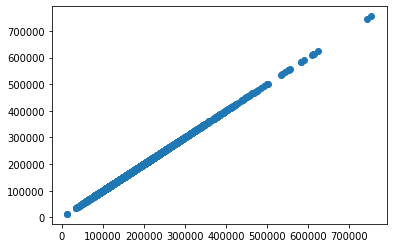

In [5]:
x = data['target']
y = data['target']
plt.scatter(x,y);

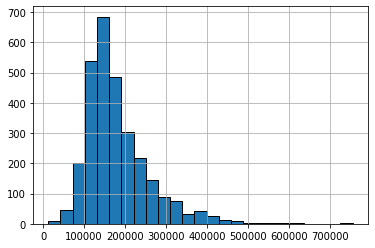

In [6]:
data['target'].hist(edgecolor = 'Black', bins=25);

In [7]:
#shows all the columns that have got more than 0 NA values 
nan_per_col = data.isna().sum()
missing_values = nan_per_col[nan_per_col>0]
print(missing_values)
# feature 11,12,15 have the greatest amount of nan values so we will be dropping these columns


feature01       1
feature02       1
feature04       1
feature11    2732
feature12    2358
feature13       1
feature15    1422
dtype: int64


In [463]:
#find the percentage of na values that each feature with nan values has
percentage_nan = (missing_values / len(data) * 100)
print(percentage_nan)

feature01     0.034176
feature02     0.034176
feature04     0.034176
feature11    93.369788
feature12    80.587833
feature13     0.034176
feature15    48.598770
dtype: float64


### Drop NA Values and Create Dummy Variables

In [8]:
# remove columns with a lot of the nan values
col_to_remove = ['feature11', 'feature12', 'feature15']
data.drop(col_to_remove, axis=1, inplace= True)

In [263]:
# replace the NAN values with the mean of the respective columns 
data[['feature01','feature02', 'feature04']] = data[['feature01','feature02', 'feature04']].fillna(data[['feature01','feature02', 'feature04']].mean())

In [279]:
# Create dummy variables
# == return True or False and astype('int') coverts to 1 for True and 0 for False
# create dummy varaible for feature13
data['red'] = (data['feature13'] == 1).astype('int')
data['blue'] = (data['feature13'] == 2).astype('int')
data['green'] = (data['feature13'] == 3).astype('int')
data['yellow'] = (data['feature13']== 4).astype('int')
# we leave one colour out k-1 as other wise we will 
# get multicollonearity and the model will be worse

#creaing dummy variables for feature16
data['bad'] = (data['feature16'] == 1).astype('int')
data['good'] = (data['feature16'] == 2).astype('int')
data['amazing'] = (data['feature16'] == 3).astype('int')
data['okay'] = (data['feature16']== 4).astype('int')
# the same applies to feature16

data.head()

,id,target,feature01,feature02,feature03,feature04,feature05,feature06,feature07,feature08,...,feature22,feature23,red,blue,green,yellow,bad,good,amazing,okay
0,1,215000,2.0,528.0,0,1080.0,1656,7,1656,6,...,0,1960,0,0,0,0,0,0,0,0
1,2,105000,1.0,730.0,0,882.0,896,5,896,5,...,0,1961,0,0,0,0,0,0,0,0
2,3,172000,1.0,312.0,0,1329.0,1329,6,1329,6,...,0,1958,0,0,0,0,0,0,0,0
3,4,244000,2.0,522.0,0,2110.0,2110,8,2110,7,...,0,1968,0,0,0,0,0,0,0,0
4,5,189900,2.0,482.0,0,928.0,928,6,1629,5,...,701,1998,0,0,0,0,0,0,0,0


### Linear Regression

In [402]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler


In [409]:
# deterime the x(feature_names)
feature_names = {'feature01', 'feature02', 'feature03', 'feature04','feature05','feature06','feature07', 'feature08', 
                'feature09','feature10', 'feature10.1', 'feature14', 'feature17', 'feature18', 'feature19',
                'feature20', 'feature21', 'feature22', 'feature23', 'red', 'blue', 'green', 'yellow',
                'bad', 'good', 'amazing', 'okay'} 
target_name = 'target'
robust_scaler = RobustScaler()
x = data[feature_names]
x = robust_scaler.fit_transform(x)
y = data[target_name]

In [417]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 120)

In [418]:
#create and instance of the model
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()

In [419]:
#train model 
linear_regression_model.fit(x_train,y_train)

LinearRegression()

### Utvärdering av modellen

#### Root Mean Square Error

In [440]:
from sklearn.metrics import mean_squared_error
# get the predictions of the model for the data it has not seen (testing)
y_pred_test = linear_regression_model.predict(x_test)
# all metrics compare in some way how close are the predition vs actual values
error_metric = mean_squared_error(y_pred= y_pred_test, y_true= y_test, squared=False)
print('The root mean sqaured error of this model is: ', error_metric)

The root mean sqaured error of this model is:  31390.598015510088


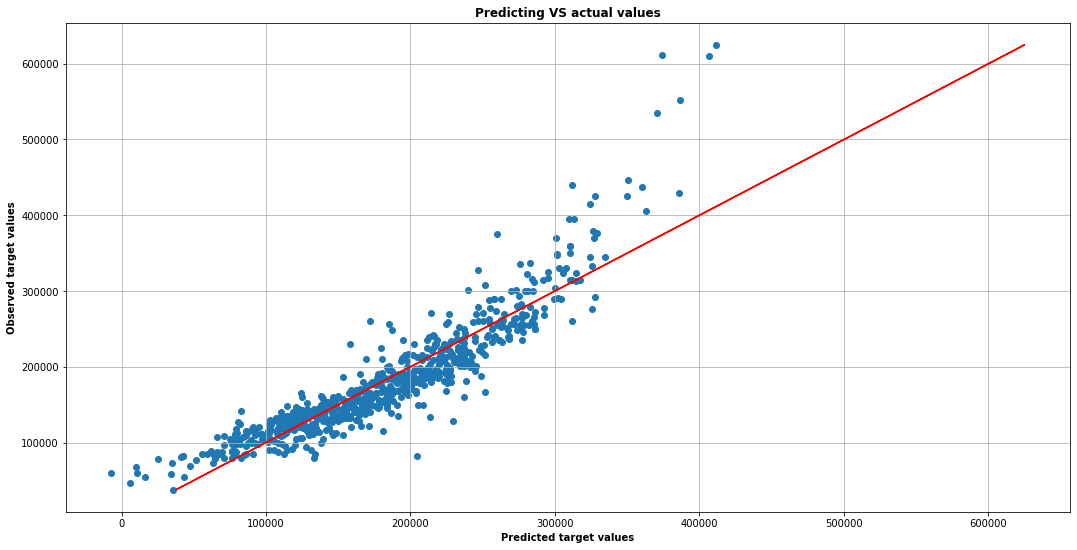

In [444]:
fig, ax = plt.subplots(figsize=(18, 9))
ax.scatter(y_pred_test, y_test)
ax.plot(y_test, y_test, color = 'red')
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)
ax.set_ylabel('Observed target values', fontweight='bold')
ax.set_xlabel('Predicted target values', fontweight='bold')
ax.set_title('Predicting VS actual values', fontweight = 'bold')
plt.grid()

##### R2 model 

In [439]:
# R2 model The higher the R2 value is to 1.0 the better the model is. 
from sklearn.metrics import r2_score

r2_score(y_true= y_test, y_pred= y_pred_test)


0.8334414703082087